<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [86]:
import pandas as pd
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [6]:
# Read CSV
house_csv = ".../../Sacramento_transactions.csv"
house = pd.read_csv(house_csv)

In [8]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [10]:
house.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [27]:
house.shape

(985, 12)

In [33]:
house.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [36]:
house['zip'] = house['zip'].astype(str)

In [38]:
house.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

<AxesSubplot:>

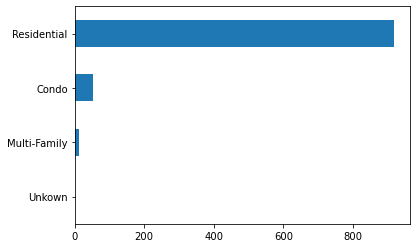

In [45]:
house['type'].value_counts().sort_values().plot(kind = 'barh')

In [47]:
house[house['type'] == 'Unkown']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unkown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183


In [49]:
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [58]:
house_plot = house[house['sq__ft']<= 0]

In [59]:
house_noplot = house[house['sq__ft']> 0]

In [60]:
house_noplot.shape

(814, 12)

In [72]:
house_plot.shape

(171, 12)

In [74]:
house.loc[house['sq__ft']==0, ['type']] = 'Plot'

<AxesSubplot:>

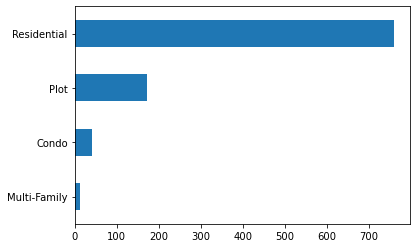

In [75]:
house['type'].value_counts().sort_values().plot(kind = 'barh')

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [104]:
# ANSWER
#The price since that's what we're trying to predict
Y = house_noplot['price']

#### 2.2 List all possible variables which might be Predictor variable.

In [105]:
# ANSWER
#No. of beds, #No. of bats, total sq.ft, Sale Date
X = house_noplot['sq__ft']

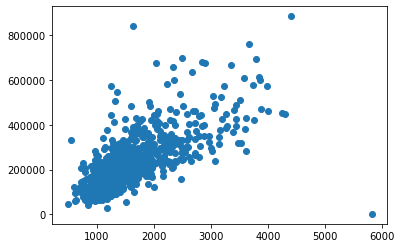

In [90]:
plt.scatter(X,Y)

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [91]:
# ANSWER
house_noplot.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.654746,0.695710,0.441988,-0.107440,0.056713
baths,0.654746,1.000000,0.724631,0.501820,-0.081249,0.108081
sq__ft,0.695710,0.724631,1.000000,0.693708,-0.103287,0.135809
price,0.441988,0.501820,0.693708,1.000000,0.058475,0.278312
latitude,-0.107440,-0.081249,-0.103287,0.058475,1.000000,0.344431
longitude,0.056713,0.108081,0.135809,0.278312,0.344431,1.000000


In [92]:
house_plot.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.965246,NaN,0.495577,0.062359,0.404858
baths,0.965246,1.000000,NaN,0.509321,0.061627,0.410647
sq__ft,NaN,NaN,NaN,NaN,NaN,NaN
price,0.495577,0.509321,NaN,1.000000,-0.443037,0.278154
latitude,0.062359,0.061627,NaN,-0.443037,1.000000,0.043225
longitude,0.404858,0.410647,NaN,0.278154,0.043225,1.000000


In [ ]:
#Sq_ft has a strong correlation with beds & bath as well as with price

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [16]:
# ANSWER
#Get the mean

In [115]:
house_noplot['price'].mean()

229448.3697788698

In [117]:
ybar = house_noplot['price'].mean()

In [118]:
xbar = house_noplot['sq__ft'].mean()

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [94]:
# ANSWER

np.sqrt(house['price'].var())

138365.83908492807

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [135]:
# ANSWER
house_noplot['ybar'] = house_noplot['price'].mean()
house_noplot['xbar'] = house_noplot['sq__ft'].mean()

C:\Users\jadea\AppData\Local\Temp\ipykernel_10540\3410728018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_noplot['ybar'] = house_noplot['price'].mean()
C:\Users\jadea\AppData\Local\Temp\ipykernel_10540\3410728018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_noplot['xbar'] = house_noplot['sq__ft'].mean()


In [98]:
house_noplot.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,ybar,xbar
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,229448.369779,1591.146192
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,229448.369779,1591.146192
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,229448.369779,1591.146192
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,229448.369779,1591.146192
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,229448.369779,1591.146192


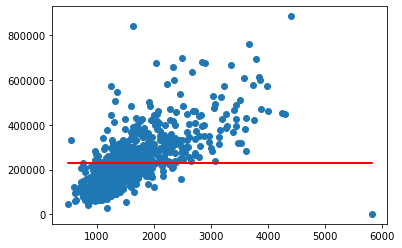

In [100]:
plt.scatter(X,Y)
plt.plot(X,house_noplot['ybar'], color = 'r')

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [134]:
# ANSWER

def calculate_beta1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y-Ybar)*(X-Xbar))
    d = np.sum(np.square(X-Xbar))
    
    beta1 = n/d
    return beta1

In [109]:
beta1 = calculate_beta1(X, Y)

print(beta1)

125.21648667984462


##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [132]:
# ANSWER
beta0 = house_noplot['price'].mean() - beta1 * house_noplot['sq__ft'].mean()

In [133]:
beta0

30210.633866918943

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [125]:
# ANSWER
yhat = beta0 + beta1 *1204

In [127]:
print( yhat)

180971.28382945186


##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [129]:
# ANSWER
house_noplot['yhat'] = beta0 + beta1 * house_noplot['sq__ft']

C:\Users\jadea\AppData\Local\Temp\ipykernel_10540\1836137971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_noplot['yhat'] = beta0 + beta1 * house_noplot['sq__ft']


In [150]:
house_noplot['residuals'] = abs(house_noplot['price'] - house_noplot['yhat'])

C:\Users\jadea\AppData\Local\Temp\ipykernel_10540\2042538717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_noplot['residuals'] = abs(house_noplot['price'] - house_noplot['yhat'])


In [168]:
Resmean = house_noplot['residuals'].mean()
Resmean

60234.1912029685

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

In [157]:
SSres = np.sum(np.square(house_noplot['price'] - house_noplot['yhat']))
SStot = np.sum(np.square(house_noplot['price'] - house_noplot['ybar']))

R2 = 1 - (SSres/SStot)

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [155]:
# ANSWER

In [158]:
print(R2)

0.4812307133326901


##### 2.7.F [BONUS] Draw Plot of Predicted Line

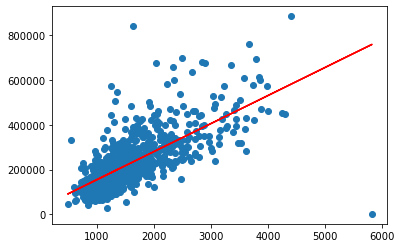

In [153]:
# ANSWER
plt.scatter(house_noplot['sq__ft'], house_noplot['price'])
plt.plot(house_noplot['sq__ft'], house_noplot['yhat'], color = 'red')

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

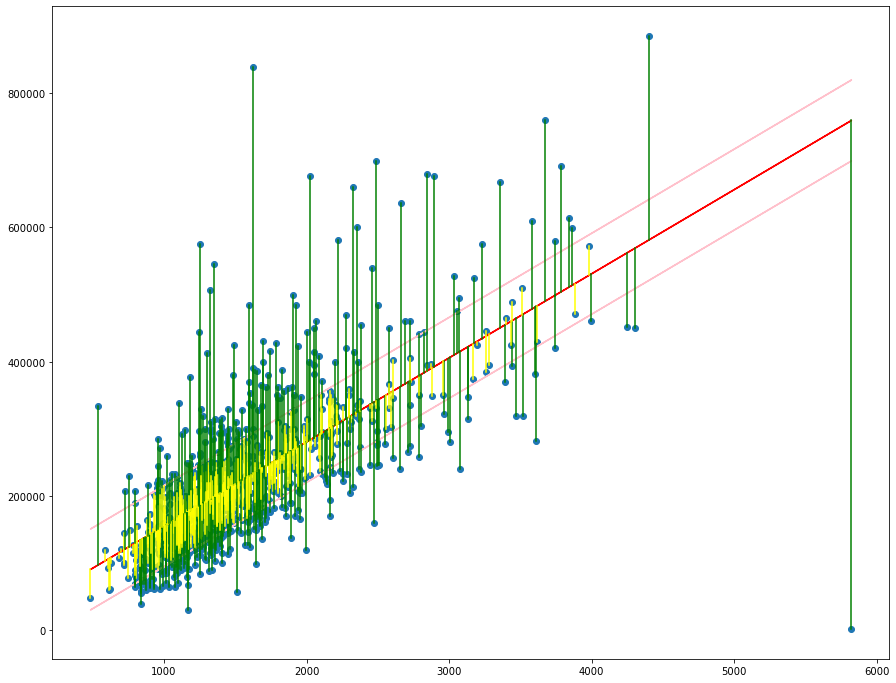

In [172]:
# ANSWER

fig = plt.figure(figsize = (15,12))
plt.scatter(house_noplot['sq__ft'], house_noplot['price'])
plt.plot(house_noplot['sq__ft'], house_noplot['yhat'], color = 'red')
plt.plot(house_noplot['sq__ft'], house_noplot['yhat']+Resmean, color = 'pink')
plt.plot(house_noplot['sq__ft'], house_noplot['yhat']-Resmean, color = 'pink')
for _, row in house_noplot.iterrows():
    if abs(row['price'] - row['yhat']) > Resmean:
        color = 'green'
    else:
        color = 'yellow'
    
    
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['yhat']), color = color)
    

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [164]:
# ANSWER
Predition = beta0 + beta1*1204

print(f"Predicted price would be {Predition}")

Predicted price would be 180971.28382945186




---



---



> > > > > > > > > © 2022 Institute of Data


---



---



